This document explains and demonstrates:

* How to save a figure using `fig.savefig()` (preferred for the OO interface) or `plt.savefig()` (for the `pyplot` interface).
* Saving to various common formats like `PNG`, `PDF`, `JPG`, and `SVG` (format is usually inferred from the filename extension).
* Key parameters:
    * `dpi`: Controls the resolution (dots per inch) for raster formats.
    * `bbox_inches='tight'`: Attempts to remove extra whitespace around the figure.
    * `transparent=True`: Saves the figure with a transparent background.
* The importance of saving before calling `plt.show()`.

This allows you to export your visualizations for use elsewhere.

--- Saving Plots ---
Saved plot as PNG: 'matplotlib_plots\sample_plot.png'
Saved plot as PDF: 'matplotlib_plots\sample_plot.pdf'


TypeError: FigureCanvasAgg.print_jpg() got an unexpected keyword argument 'quality'

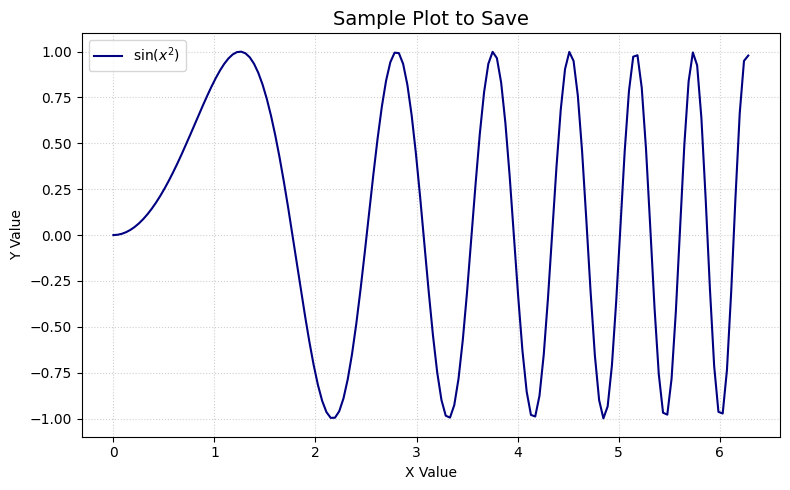

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import os # For managing files/directories

# --- 1. Create a Sample Plot ---
# We'll use the Object-Oriented interface as it's generally preferred.

fig, ax = plt.subplots(figsize=(8, 5))

x = np.linspace(0, 2 * np.pi, 150)
y = np.sin(x**2)

ax.plot(x, y, label=r'$\sin(x^2)$', color='navy')
ax.set_title('Sample Plot to Save', fontsize=14)
ax.set_xlabel('X Value')
ax.set_ylabel('Y Value')
ax.legend()
ax.grid(True, linestyle=':', alpha=0.6)

# It's good practice to adjust layout before saving
plt.tight_layout()

# Define output directory and filenames
output_dir = 'matplotlib_plots'
if not os.path.exists(output_dir):
    os.makedirs(output_dir) # Create directory if it doesn't exist

png_file = os.path.join(output_dir, 'sample_plot.png')
pdf_file = os.path.join(output_dir, 'sample_plot.pdf')
jpg_file = os.path.join(output_dir, 'sample_plot.jpg')
svg_file = os.path.join(output_dir, 'sample_plot.svg')
high_dpi_file = os.path.join(output_dir, 'sample_plot_high_dpi.png')
tight_bbox_file = os.path.join(output_dir, 'sample_plot_tight.png')
transparent_file = os.path.join(output_dir, 'sample_plot_transparent.png')


# --- 2. Saving the Plot using fig.savefig() ---
# This is the method called on the Figure object.

print("--- Saving Plots ---")

# a) Save as PNG (common raster format)
# Format is usually inferred from the filename extension.
fig.savefig(png_file)
print(f"Saved plot as PNG: '{png_file}'")

# b) Save as PDF (common vector format - good for documents)
fig.savefig(pdf_file)
print(f"Saved plot as PDF: '{pdf_file}'")

# c) Save as JPG (lossy raster format - smaller size, potential quality loss)
# Note: Quality issues can arise with sharp lines/text in JPG. PNG is often better for plots.
fig.savefig(jpg_file, quality=90) # Can specify quality for JPG (0-100)
print(f"Saved plot as JPG: '{jpg_file}'")

# d) Save as SVG (vector format - scalable without quality loss, good for web/editing)
fig.savefig(svg_file)
print(f"Saved plot as SVG: '{svg_file}'")

# e) Specifying Resolution (dpi - dots per inch)
# Higher DPI means higher resolution (especially for raster formats like PNG).
fig.savefig(high_dpi_file, dpi=300) # Default is often 100 or based on rcParams
print(f"Saved plot with high DPI (300): '{high_dpi_file}'")

# f) Adjusting Bounding Box (bbox_inches='tight')
# Often used to remove excess whitespace around the plot.
# Can sometimes clip elements if not used carefully with tight_layout.
fig.savefig(tight_bbox_file, bbox_inches='tight')
print(f"Saved plot with tight bounding box: '{tight_bbox_file}'")

# g) Saving with Transparent Background
# Useful for overlaying plots on other backgrounds.
fig.savefig(transparent_file, transparent=True)
print(f"Saved plot with transparent background: '{transparent_file}'")


# --- 3. Saving using plt.savefig() (Pyplot interface) ---
# If you created the plot using only pyplot functions (e.g., plt.plot()),
# you can use plt.savefig(). It saves the *current* figure.
# It's generally recommended to use fig.savefig() when using the OO interface.

# Example (commented out as we used OO above):
# plt.figure() # Create a figure implicitly
# plt.plot(x, np.cos(x))
# plt.title("Pyplot Save Example")
# plt.savefig(os.path.join(output_dir, 'pyplot_save.png'))
# print("Saved plot using plt.savefig().")


# --- 4. Important Notes ---
# - Call savefig() *before* plt.show(). Calling show() might clear the figure in some backends.
# - The file format is typically inferred from the extension (.png, .pdf, .svg, .jpg, .tif, etc.).
# - Vector formats (PDF, SVG) are resolution-independent and usually better for line art and text.
# - Raster formats (PNG, JPG) are pixel-based. PNG is lossless (good for plots), JPG is lossy (good for photos).

# Close the plot window explicitly (optional, frees up memory)
plt.close(fig)
print("\n--- Saving complete. Check the 'matplotlib_plots' directory. ---")

# You might want to manually delete the 'matplotlib_plots' directory after checking the files.